In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import glob
import subprocess

os.chdir("/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code")
import functions_calculate_image_average_extract_coordinates as pipeline_functions


colors = {'Target':'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:purple', 5:'tab:brown'}

def plot_dataset(images_path,reference_path,cam_type):
    cam_types = ['Mapir', 'Mapir', 'Stationary']
    if cam_type not in cam_types:
        raise ValueError("Invalid camera type. Expected one of: %s" % cam_types)

    images = pd.read_csv(images_path)
    images["file_name"] = images["file_name"].str[:-4]
    images = images.sort_values(["flight", "image"], ascending = (True, True))
    images["order_all"] = list(range(1,len(images["file_name"]+1)))
    phantom_reflectance["file_name"] = phantom_reflectance["file_name"].str[:-4]
    images = pd.read_csv(images_path)
    images["file_name"] = images["file_name"].str[:-4]
    reference_target = pd.read_csv(images_path)
    reference_target = reference_target.sort_values(["flight"], ascending = (True))
    reference_target["order_all"] = list(range(1,len(phantom_reflectance["file_name"])+1))
    reference_target["flight"] = "Target"
    combined = pd.concat([reference_target,reference_target])
    combined = combined.reset_index()
    combined["date"] = combined.date.astype(str)
    combined["date"] = [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in combined["date"]]
    #{['Phantom':0, 'Mapir':1, 'Stationary':2]}
    
    #need to apply function to each type of camera and then plot at once
    combined.plot(x="date", y="mean_red", kind="scatter",c=combined['flight'].map(colors),title='Image Reflectance Per Flight', xlabel = "Time", ylabel = "Red Reflectance", ax=axis[{'Phantom':0, 'Mapir':1, 'Stationary':2}[cam_type]])

  

Work with Phantom Data:
Step 1: Extract image metadata and coordinates from Phantom Images and Calculate averages:
Step 2: Read in averages, Remove, file extension Sort images and create an overall order and plot change in reflectance over time/



In [24]:
#general path to date folder
aquis_folder = "5_2019_Jan/Jan_08_2019/"
proj_base_path= "/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/" + aquis_folder


In [25]:
phantom_path = proj_base_path + '/Proccessed_Images/Phantom/'

if not os.path.exists(phantom_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(phantom_path)
    
Phantom_images = pd.read_csv(phantom_path + "image_mean_reflectance.csv")
Phantom_images = Phantom_images.sort_values(["flight", "image"], ascending = (True, True))
Phantom_images["order_all"] = list(range(1,len(Phantom_images["file_name"])+1))
Phantom_images


,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
1215,0,2019_Jan_08_Phantom_Flight_1_1,1,1,2019:01:08 10:07:30,89.56,66.71,125.01,70.34,87.10,49.90,1
1340,0,2019_Jan_08_Phantom_Flight_1_2,1,2,2019:01:08 10:08:46,96.61,69.72,132.72,72.33,90.93,50.53,2
1376,0,2019_Jan_08_Phantom_Flight_1_3,1,3,2019:01:08 10:08:48,95.49,71.33,130.38,73.15,90.64,52.83,3
1082,0,2019_Jan_08_Phantom_Flight_1_4,1,4,2019:01:08 10:08:50,94.29,69.52,129.89,71.76,90.89,50.86,4
1147,0,2019_Jan_08_Phantom_Flight_1_5,1,5,2019:01:08 10:08:52,92.86,71.07,128.30,73.22,89.22,53.55,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1813,0,2019_Jan_08_Phantom_Flight_5_389,5,389,2019:01:08 11:41:32,79.83,51.72,135.76,58.67,85.46,45.75,1854
44,0,2019_Jan_08_Phantom_Flight_5_390,5,390,2019:01:08 11:41:34,82.55,52.07,139.23,58.51,89.09,46.39,1855
74,0,2019_Jan_08_Phantom_Flight_5_391,5,391,2019:01:08 11:41:36,83.09,52.01,140.12,58.23,89.56,46.18,1856
179,0,2019_Jan_08_Phantom_Flight_5_392,5,392,2019:01:08 11:41:38,86.42,51.83,144.92,57.92,92.49,46.05,1857


Read in Phantom Reflectance Target Images

In [16]:
Phantom_Reflectance_path= proj_base_path + '/Reflectance/Phantom/'

if not os.path.exists(Phantom_Reflectance_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(Phantom_Reflectance_path)
    

phantom_reflectance = pd.read_csv(Phantom_Reflectance_path + "image_mean_reflectance.csv")
phantom_reflectance = phantom_reflectance.sort_values(["flight"], ascending = (True))
phantom_reflectance["order_all"] = list(range(1,len(phantom_reflectance["file_name"])+1))
phantom_reflectance["flight"] = "Target"
phantom_reflectance


,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
0,0,2019_Jan_8_Flight_3_Reflectance_Post_1,Target,Post,2019:01:08 11:02:56,92.17,46.07,105.17,37.80,59.73,39.94,1
1,0,2019_Jan_8_Flight_1_Reflectance_Post_1,Target,Post,2019:01:08 10:22:12,111.08,69.14,118.85,62.83,90.32,66.26,2
2,0,2019_Jan_8_Flight_2_Reflectance_Post_1,Target,Post,2019:01:08 10:40:30,135.01,57.33,141.69,48.28,90.40,54.16,3


Combine Phantom Images with the reflectance target data

In [17]:
phantom = pd.concat([phantom_reflectance,Phantom_images])
phantom = phantom.reset_index()
phantom["date"] = phantom.date.astype(str)
phantom["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in phantom["date"]]
phantom

,index,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
0,0,0,2019_Jan_8_Flight_3_Reflectance_Post_1,Target,Post,2019-01-08 11:02:56,92.17,46.07,105.17,37.80,59.73,39.94,1
1,1,0,2019_Jan_8_Flight_1_Reflectance_Post_1,Target,Post,2019-01-08 10:22:12,111.08,69.14,118.85,62.83,90.32,66.26,2
2,2,0,2019_Jan_8_Flight_2_Reflectance_Post_1,Target,Post,2019-01-08 10:40:30,135.01,57.33,141.69,48.28,90.40,54.16,3
3,1215,0,2019_Jan_08_Phantom_Flight_1_1,1,1,2019-01-08 10:07:30,89.56,66.71,125.01,70.34,87.10,49.90,1
4,1340,0,2019_Jan_08_Phantom_Flight_1_2,1,2,2019-01-08 10:08:46,96.61,69.72,132.72,72.33,90.93,50.53,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,1813,0,2019_Jan_08_Phantom_Flight_5_389,5,389,2019-01-08 11:41:32,79.83,51.72,135.76,58.67,85.46,45.75,1854
1857,44,0,2019_Jan_08_Phantom_Flight_5_390,5,390,2019-01-08 11:41:34,82.55,52.07,139.23,58.51,89.09,46.39,1855
1858,74,0,2019_Jan_08_Phantom_Flight_5_391,5,391,2019-01-08 11:41:36,83.09,52.01,140.12,58.23,89.56,46.18,1856
1859,179,0,2019_Jan_08_Phantom_Flight_5_392,5,392,2019-01-08 11:41:38,86.42,51.83,144.92,57.92,92.49,46.05,1857


Read in Stationary Reflectance
*note october 2nd the folders are messed up so you have to use this special function

In [18]:
Station_path= proj_base_path + "Reflectance/Stationary_Reflectance/"

if not os.path.exists(Station_path + "image_mean_reflectance.csv"):
    pipeline_functions.calc_image_average_stationary(Station_path)
    
stationary_refectance = pd.read_csv(Station_path + "image_mean_reflectance.csv")
stationary_refectance = stationary_refectance.sort_values(["date"], ascending = (True))
stationary_refectance["order_all"] = list(range(1,len(stationary_refectance["file_name"])+1))

stationary_refectance["date"] = stationary_refectance.date.astype(str)
stationary_refectance["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in stationary_refectance["date"]]
stationary_refectance["flight"] = 1
stationary_refectance["image"] = stationary_refectance["order_all"]
stationary_refectance

,Unnamed: 0,file_name,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all,flight,image
69,0,2018_0108_100208_001,2018-01-08 10:02:08,60.10,38.34,81.55,50.94,61.65,35.64,1,1,1
83,0,2018_0108_100309_002,2018-01-08 10:03:09,66.60,39.36,91.03,53.60,62.84,39.05,2,1,2
65,0,2018_0108_100410_003,2018-01-08 10:04:10,47.06,30.95,63.27,44.17,56.75,31.17,3,1,3
22,0,2018_0108_100515_004,2018-01-08 10:05:14,62.96,38.01,88.21,53.12,61.45,37.78,4,1,4
67,0,2018_0108_100616_005,2018-01-08 10:06:15,65.79,37.84,91.34,52.66,64.91,38.10,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
86,0,2018_0108_113551_093,2018-01-08 11:35:51,28.99,19.13,45.63,37.45,28.44,13.10,93,1,93
36,0,2018_0108_113652_094,2018-01-08 11:36:52,27.16,17.94,43.56,37.05,26.12,12.12,94,1,94
14,0,2018_0108_113753_095,2018-01-08 11:37:53,27.08,17.87,43.53,37.02,26.04,12.11,95,1,95
18,0,2018_0108_113854_096,2018-01-08 11:38:54,26.95,18.36,43.84,37.76,24.92,12.59,96,1,96


Adjust Time Stamp values that were messed up due to cameras not being insync

Phantom = Correct
MAPIR = 3 Hours Early
Stationary = Correct


In [21]:
hours_added = dt.timedelta(hours = 0)
phantom["date"] = phantom["date"]+hours_added

<AxesSubplot:title={'center':'Phantom'}, xlabel='Time', ylabel='Red Reflectance'>

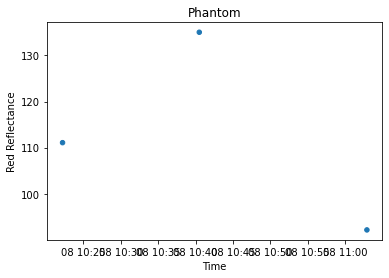

In [22]:
phantom_target = phantom[phantom["flight"] == "Target"]
phantom_target

phantom_target.plot(x="date", y="mean_red", kind="scatter",c=phantom_target['flight'].map(colors),title='Phantom', xlabel = "Time", ylabel = "Red Reflectance")
# Make most of the ticklabels empty so the labels don't get too crowded

#ticklabels_1 = ['']*len(phantom.index)
# Every 4th ticklable shows the month and day
#ticklabels_1[::2] = [item.strftime('%H:%M') for item in phantom.date[::2]]
#ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))
#date_form = DateFormatter('%H:%M')
#ax_1.xaxis.set_major_formatter(date_form)


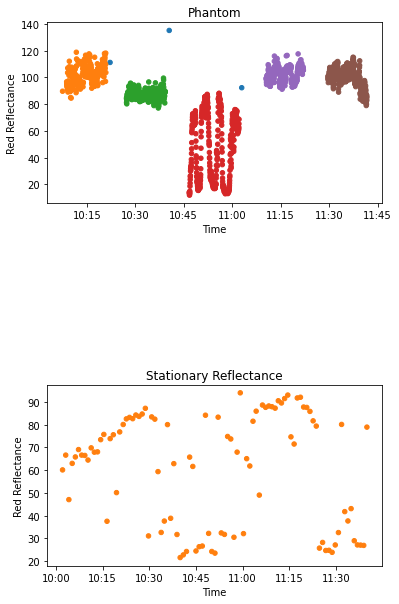

In [27]:

figure, axis = plt.subplots(2, 1)

# Phantom Data
ax_1 = phantom.plot(x="date", y="mean_red", kind="scatter",c=phantom['flight'].map(colors),title='Phantom', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[0])
# Make most of the ticklabels empty so the labels don't get too crowded

#ticklabels_1 = ['']*len(phantom.index)
# Every 4th ticklable shows the month and day
#ticklabels_1[::2] = [item.strftime('%H:%M') for item in phantom.date[::2]]
#ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))
date_form = DateFormatter('%H:%M')
ax_1.xaxis.set_major_formatter(date_form)

  
# stationary_refectance
ax_3 = stationary_refectance.plot(x="date", y="mean_red", kind="scatter",c=stationary_refectance['flight'].map(colors),title='Stationary Reflectance', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[1])
# Make most of the ticklabels empty so the labels don't get too crowded
#ticklabels_3 = ['']*len(stationary_refectance.index)
# Every 4th ticklable shows the month and day
#ticklabels_3[::2] = [item.strftime('%H:%M') for item in stationary_refectance.date[::2]]
#ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))
ax_3.xaxis.set_major_formatter(date_form)


plt.subplots_adjust(hspace = 1)



figure.patch.set_facecolor('white')
figure.set_figheight(10)
#plt.savefig(proj_base_path + 'Proccessed_Images/1_Raw_Reflectance_2018_Feb_28.png', bbox_inches='tight')


#Next Images have to be normalized:

Step 1: identify normalization images. 
    
Step 2: 
    Normalize data using the following bash/python code




In [32]:
#Phantom Images


sourceFolder = aquis_folder+ "/Proccessed_Images/Phantom"
destImage_rel = "2019_Jan_08_Phantom_Flight_1_216.JPG"

command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + 'destImage_rel=' + destImage_rel + '; ' + 'destImage="${sourceFolder}/${destImage_rel}"; ' + 'ls *.JPG | xargs -n 1 -P 9 -I @ python /Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py -sourceFolder $sourceFolder -destImage $destImage -image @'


subprocess.call(command,shell=True)


creating output folder at /Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/output/
creating output folder at /Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/output/creating output folder at /Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/output/
creating output folder at /Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/output/creating output folder at /Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/output/creating output folder at /Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/output/


creating output folder at /Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Ya

Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py", line 44, in <module>
  File "/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py", line 44, in <module>
Traceback (most recent call last):
  File "/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py", line 44, in <module>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py", line 44, in <module>
Traceback (most recent call last):
  File "/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py", l

/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/2019_Jan_08_Phantom_Flight_1_115.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/2019_Jan_08_Phantom_Flight_1_111.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/2019_Jan_08_Phantom_Flight_1_114.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/2019_Jan_08_Phantom_Flight_1_113.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/2019_Jan_08_Phantom_Flight_1_112.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/5_2019_Jan/Jan_08_2019//Proccessed_Images/Phantom/2019_Jan_08_Phantom_Flight_1_109.JPG
/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Dr

1

In [ ]:
#Phantom Reflectance Tartget

sourceFolder="2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Phantom"
destImage_rel = "2018_Oct_02_Phantom_Flight_1_48.JPG"
reflectance_folder="2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Phantom"


command = 'sourceFolder=' + sourceFolder + '; ' + 'reflectance_folder=' + reflectance_folder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${reflectance_folder}"; ' + 'destImage_rel=' + destImage_rel + '; ' + 'destImage="${sourceFolder}/${destImage_rel}"; ' + 'ls *.JPG | xargs -n 1 -P 9 -I @ python /Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py -sourceFolder $reflectance_folder -destImage $destImage -image @ -reflectance_target "yes"'


subprocess.call(command,shell=True)



Now that all normalized images have been created, we need to add back in the exif data to the normalized images with Exif tools.

First add the phantom images back in

In [37]:
#Phantom Images

sourceFolder= aquis_folder+ "/Proccessed_Images/Phantom"

command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/Seagate_14_TB/Google_Drive_Back_up/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + '''add_exif() {
    image=$1; outputname="${image/.JPG/_HSV_V_fixed.JPG}"; output="./output/${outputname}"; eval "exiftool -q -q -overwrite_original_in_place -TagsFromFile ${image} $'-all:all>all:all' ${output}"
    }; ''' +  'export -f add_exif; ' + 'parallel -j8 add_exif {} ::: *.JPG'

subprocess.call(command,shell=True)

Error: File not found - ./output/2019_Jan_08_Phantom_Flight_1_1_HSV_V_fixed.JPG
Error: File not found - ./output/2019_Jan_08_Phantom_Flight_1_102_HSV_V_fixed.JPG
Error: File not found - ./output/2019_Jan_08_Phantom_Flight_1_10_HSV_V_fixed.JPG
Error: File not found - ./output/2019_Jan_08_Phantom_Flight_1_105_HSV_V_fixed.JPG
Error: File not found - ./output/2019_Jan_08_Phantom_Flight_1_104_HSV_V_fixed.JPG
Error: File not found - ./output/2019_Jan_08_Phantom_Flight_1_103_HSV_V_fixed.JPG
Error: File not found - ./output/2019_Jan_08_Phantom_Flight_1_107_HSV_V_fixed.JPG
Error: File not found - ./output/2019_Jan_08_Phantom_Flight_1_108_HSV_V_fixed.JPG
Error: Temporary file already exists: ./output/2019_Jan_08_Phantom_Flight_1_251_HSV_V_fixed.JPG_exiftool_tmp
Error: Temporary file already exists: ./output/2019_Jan_08_Phantom_Flight_1_258_HSV_V_fixed.JPG_exiftool_tmp
Error: Temporary file already exists: ./output/2019_Jan_08_Phantom_Flight_1_261_HSV_V_fixed.JPG_exiftool_tmp
Error: Temporary fil

15

In [47]:
#After images have been normalized. Here we create the same graph as above to see how well normalization worked
#os.path.exists(phantom_path +"output/" "image_mean_reflectance.csv")
phantom_path = aquis_folder+ "Proccessed_Images/Phantom/"
phantom_path +"output/" "image_mean_reflectance.csv"

'5_2019_Jan/Jan_08_2019/Proccessed_Images/Phantom/output/image_mean_reflectance.csv'

In [48]:
phantom_path = proj_base_path + '/Proccessed_Images/Phantom/'

if not os.path.exists(phantom_path +"output/" "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(phantom_path,post_norm=True)
    
Phantom_images_post_norm = pd.read_csv(phantom_path + "output/" "image_mean_reflectance.csv")
Phantom_images_post_norm = Phantom_images_post_norm.sort_values(["flight", "image"], ascending = (True, True))
Phantom_images_post_norm["order_all"] = list(range(1,len(Phantom_images_post_norm["file_name"])+1))

Phantom_images_post_norm


Image has issue
Image has issue
Image has issue
Image has issue
Writing CSV with mean reflectance for 1842 images


,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
1080,0,2019_Jan_08_Phantom_Flight_1_2_HSV_V_fixed,1,2,2019:01:08 10:08:46,96.65,65.28,133.57,68.54,91.23,49.18,1
1740,0,2019_Jan_08_Phantom_Flight_1_3_HSV_V_fixed,1,3,2019:01:08 10:08:48,97.75,67.00,134.54,69.35,93.31,51.34,2
1494,0,2019_Jan_08_Phantom_Flight_1_4_HSV_V_fixed,1,4,2019:01:08 10:08:50,96.94,66.20,134.61,69.16,93.87,50.26,3
1239,0,2019_Jan_08_Phantom_Flight_1_5_HSV_V_fixed,1,5,2019:01:08 10:08:52,95.71,66.64,133.72,69.01,92.72,51.73,4
55,0,2019_Jan_08_Phantom_Flight_1_6_HSV_V_fixed,1,6,2019:01:08 10:08:54,97.20,67.38,134.49,69.86,92.92,52.74,5
...,...,...,...,...,...,...,...,...,...,...,...,...
40,0,2019_Jan_08_Phantom_Flight_5_389_HSV_V_fixed,5,389,2019:01:08 11:41:32,80.25,54.77,134.17,67.93,84.29,50.55,1838
86,0,2019_Jan_08_Phantom_Flight_5_390_HSV_V_fixed,5,390,2019:01:08 11:41:34,80.35,54.26,133.15,66.91,85.03,50.50,1839
812,0,2019_Jan_08_Phantom_Flight_5_391_HSV_V_fixed,5,391,2019:01:08 11:41:36,81.21,54.95,134.30,67.98,85.65,51.12,1840
1404,0,2019_Jan_08_Phantom_Flight_5_392_HSV_V_fixed,5,392,2019:01:08 11:41:38,82.30,54.30,135.23,67.46,86.05,50.66,1841


In [49]:
Phantom_Reflectance_path='/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Phantom/'

if not os.path.exists(Phantom_Reflectance_path +"output/"+ "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(Phantom_Reflectance_path,post_norm=True)
    

phantom_reflectance_post_norm = pd.read_csv(Phantom_Reflectance_path +"output/"+ "image_mean_reflectance.csv")
phantom_reflectance_post_norm = phantom_reflectance_post_norm.sort_values(["flight"], ascending = (True))
phantom_reflectance_post_norm["order_all"] = list(range(1,len(phantom_reflectance_post_norm["file_name"])+1))
phantom_reflectance_post_norm["flight"] = "Target"
phantom_reflectance_post_norm




ValueError: No objects to concatenate

In [50]:
phantom_post_norm = pd.concat([phantom_reflectance_post_norm,Phantom_images_post_norm])
phantom_post_norm = phantom_post_norm.reset_index()
phantom_post_norm["date"] = phantom_post_norm.date.astype(str)
phantom_post_norm["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in phantom_post_norm["date"]]


phantom_post_norm["GCC"] = phantom_post_norm["mean_green"]/(phantom_post_norm["mean_red"]+phantom_post_norm["mean_green"]+phantom_post_norm["mean_blue"])
phantom_post_norm

NameError: name 'phantom_reflectance_post_norm' is not defined

In [ ]:
MAPIR_reflectance_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Mapir/Processed_2/"

if not os.path.exists(MAPIR_reflectance_path +"output/"+ "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_reflectance_path,post_norm=True)

Mapir_reflectance_post_norm = pd.read_csv(MAPIR_reflectance_path +"output/"+ "image_mean_reflectance.csv")
Mapir_reflectance_post_norm = Mapir_reflectance_post_norm.sort_values(["flight", "image"], ascending = (True, True))
Mapir_reflectance_post_norm["order_all"] = list(range(1,len(Mapir_reflectance_post_norm["file_name"])+1))
Mapir_reflectance_post_norm["flight"] = "Target"

Mapir_reflectance_post_norm

In [ ]:
Mapir_post_norm = pd.concat([Mapir_reflectance_post_norm,Mapir_images_post_norm])
Mapir_post_norm = Mapir_post_norm.reset_index()
Mapir_post_norm["date"] = Mapir_post_norm.date.astype(str)
Mapir_post_norm["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in Mapir_post_norm["date"]]
Mapir_post_norm

In [ ]:
#MAPIR Calibrated

MAPIR_1_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Processed_1/Camera_Settings_Flights_1_3/Calibrated_1/"

if not os.path.exists(MAPIR_1_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_1_path)

Mapir_images_1_3_calibrated = pd.read_csv(MAPIR_1_path + "image_mean_reflectance.csv")

MAPIR_2_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Processed_1/Camera_Settings_Flights_4_5/Calibrated_1/"

if not os.path.exists(MAPIR_2_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_2_path)

Mapir_images_4_5_calibrated = pd.read_csv(MAPIR_2_path + "image_mean_reflectance.csv")

Mapir_images_calibrated = pd.concat([Mapir_images_1_3_calibrated,Mapir_images_4_5_calibrated])
Mapir_images_calibrated = Mapir_images_calibrated.reset_index()


Mapir_images_calibrated = Mapir_images_calibrated.sort_values(["flight", "image"], ascending = (True, True))
Mapir_images_calibrated["order_all"] = list(range(1,len(Mapir_images_calibrated["file_name"])+1))

Mapir_images_calibrated



In [ ]:


Mapir_calibrated = pd.concat([Mapir_reflectance,Mapir_images_calibrated])
Mapir_calibrated = Mapir_calibrated.reset_index()
Mapir_calibrated["date"] = Mapir_calibrated.date.astype(str)
Mapir_calibrated["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in Mapir_calibrated["date"]]

Mapir_calibrated["NDVI"] = (Mapir_calibrated["mean_blue"]-Mapir_calibrated["mean_red"])/(Mapir_calibrated["mean_blue"]+ Mapir_calibrated["mean_red"])

Mapir_calibrated

In [ ]:
figure, axis = plt.subplots(3, 1)

# Phantom Data
ax_1 = phantom_post_norm.plot(x="date", y="mean_red", kind="scatter",c=phantom_post_norm['flight'].map(colors),title='Phantom After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[0])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_1 = ['']*len(phantom_post_norm.index)
# Every 4th ticklable shows the month and day
ticklabels_1[::2] = [item.strftime('%H:%M') for item in phantom_post_norm.date[::2]]
ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))



# Mapir Data
ax_2 = Mapir_post_norm.plot(x="date", y="mean_red", kind="scatter",c=Mapir_post_norm['flight'].map(colors),title='Mapir After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[1])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_2 = ['']*len(Mapir_post_norm.index)
# Every 4th ticklable shows the month and day
ticklabels_2[::2] = [item.strftime('%H:%M') for item in Mapir_post_norm.date[::2]]
ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
  
# stationary_refectance
ax_3 = stationary_refectance.plot(x="date", y="mean_red", kind="scatter",c=stationary_refectance['flight'].map(colors),title='Stationary Reflectance', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[2])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_3 = ['']*len(stationary_refectance.index)
# Every 4th ticklable shows the month and day
ticklabels_3[::2] = [item.strftime('%H:%M') for item in stationary_refectance.date[::2]]
ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))



plt.subplots_adjust(hspace = 1)



figure.patch.set_facecolor('white')
figure.set_figheight(10)
plt.savefig('/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/1_Raw_Reflectance_Oct_2nd_post_normalization.png', bbox_inches='tight')


In [ ]:
figure, axis = plt.subplots(3, 1)

# Phantom Data
ax_1 = phantom_post_norm.plot(x="date", y="GCC", kind="scatter",c=phantom_post_norm['flight'].map(colors),title='Phantom After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[0])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_1 = ['']*len(phantom_post_norm.index)
# Every 4th ticklable shows the month and day
ticklabels_1[::2] = [item.strftime('%H:%M') for item in phantom_post_norm.date[::2]]
ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))



# Mapir Data
ax_2 = Mapir_calibrated.plot(x="date", y="NDVI", kind="scatter",c=Mapir_calibrated['flight'].map(colors),title='Mapir After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[1])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_2 = ['']*len(Mapir_calibrated.index)
# Every 4th ticklable shows the month and day
ticklabels_2[::2] = [item.strftime('%H:%M') for item in Mapir_calibrated.date[::2]]
ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
  
# stationary_refectance
ax_3 = stationary_refectance.plot(x="date", y="mean_red", kind="scatter",c=stationary_refectance['flight'].map(colors),title='Stationary Reflectance', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[2])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_3 = ['']*len(stationary_refectance.index)
# Every 4th ticklable shows the month and day
ticklabels_3[::2] = [item.strftime('%H:%M') for item in stationary_refectance.date[::2]]
ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))



plt.subplots_adjust(hspace = 1)



figure.patch.set_facecolor('white')
figure.set_figheight(10)
plt.savefig('/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/1_Raw_Reflectance_Oct_2nd_post_normalization_calibration.png', bbox_inches='tight')